In [1]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-10-18 10:46:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   567KB/s    in 5m 10s  

2020-10-18 10:51:33 (781 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [14]:
!wget https://www.techsimplus.com/media/Screenshot_2020-06-13_at_7.41.41_AM.png -O image.png

--2020-10-18 11:01:47--  https://www.techsimplus.com/media/Screenshot_2020-06-13_at_7.41.41_AM.png
Resolving www.techsimplus.com (www.techsimplus.com)... 159.65.158.156
Connecting to www.techsimplus.com (www.techsimplus.com)|159.65.158.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1758927 (1.7M) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]   1.68M   570KB/s    in 3.0s    

2020-10-18 11:01:52 (570 KB/s) - ‘image.png’ saved [1758927/1758927]



In [16]:
from PIL import Image

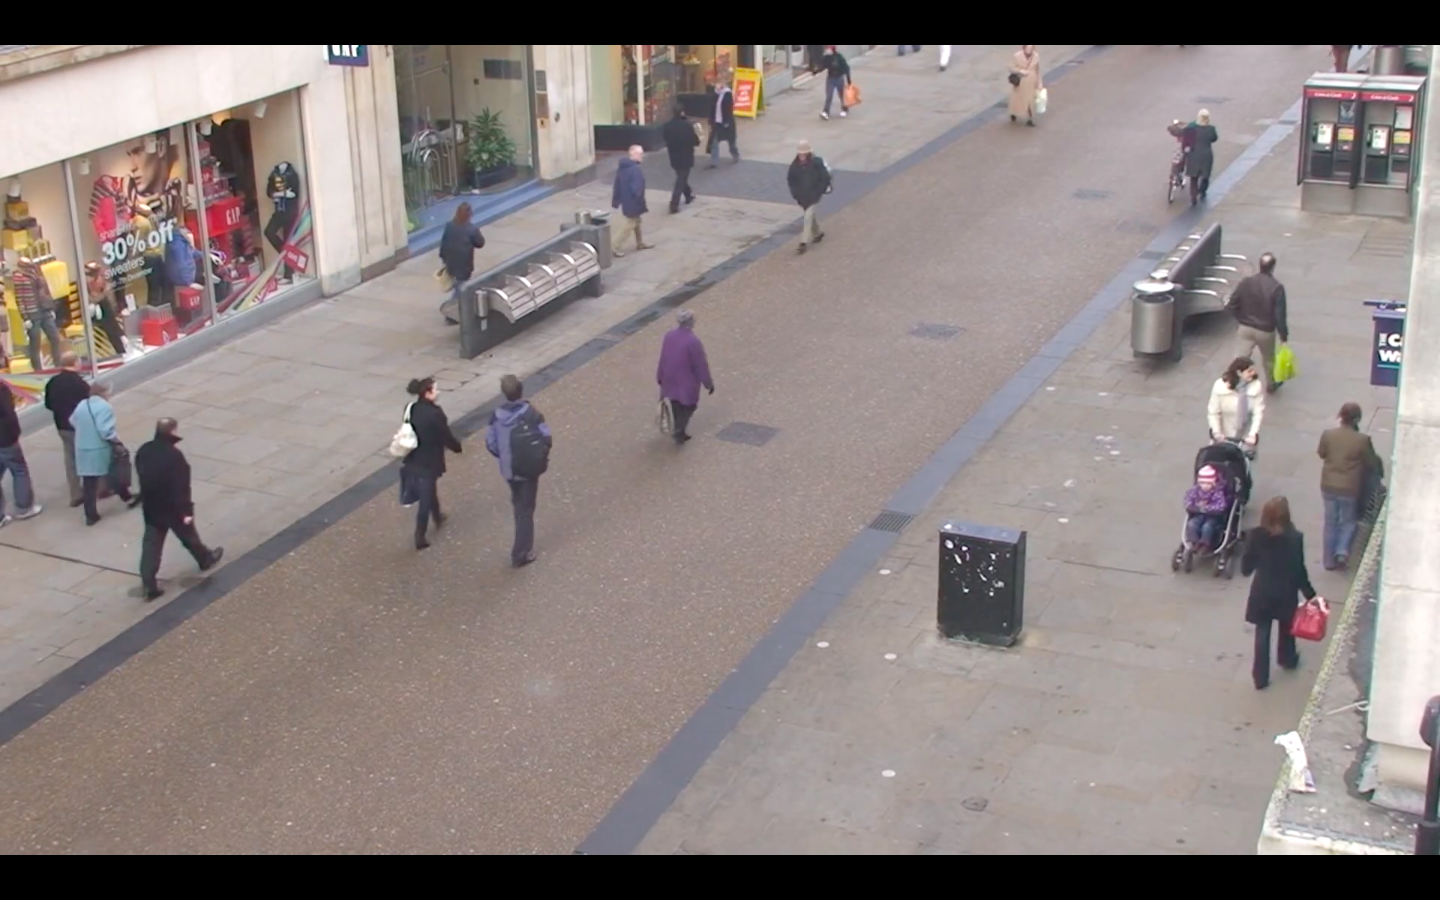

In [17]:
Image.open("image.png")

In [11]:
import numpy as np
import cv2
import os

In [46]:
LabelPath = "coco.names"
weightPath = "yolov3.weights"
confPath = "yolov3.cfg"

Labels = open(LabelPath).read().strip().split("\n")
YoloShape = (416, 416)
Mainimage = cv2.imread("image.png")
H, W = image.shape[:2]  #### we will use in for rectangle
Pre_image = cv2.dnn.blobFromImage(Mainimage, 1/255.0, YoloShape, swapRB = True)

In [47]:
Network = cv2.dnn.readNetFromDarknet(confPath, weightPath)
ln = Network.getUnconnectedOutLayersNames()

In [54]:
Network.setInput(Pre_image)
LayerOuts = Network.forward(ln)

In [59]:
Person = []
X1 = []
Y1 = []
X2 = []
Y2 = []
Cx = []
Cy = []
numP = 0
for output in LayerOuts:
    for detection in output:
        scores = detection[5:]
        classId = np.argmax(scores)
        confidence = scores[classId]
        if float(confidence) > 0.8:
            Object = Labels[classId]
            if Object == "person":
                numP += 1
                (centerX, centerY, width, height) = (detection[:4] * np.array([W, H, W, H])).astype("int")
                X, Y = int(centerX - (width/2)), int(centerY - (height/2))
                ### Storing out Data (X, Y , Cx, Cy)
                X1.append(X)
                Y1.append(Y)
                X2.append(X + width)
                Y2.append(Y + height)
                Cx.append(centerX)
                Cy.append(centerY)
                Person.append("Person-{}".format(numP))
    
                cv2.rectangle(image, (X, Y), (X+width, Y+height), (0, 255, 0), 2)
                cv2.putText(image, "Person-{}".format(numP), (X, Y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 2)
cv2.imwrite("DETECTED_IMAGE_new.jpg", image)
        

True

In [60]:
import pandas as pd
df = pd.DataFrame({
    "Person":Person,
    "X1":X1, "Y1":Y1, "X2":X2, 
    "Y2":Y2, "Cx":Cx, "Cy":Cy,
})

In [61]:
df

Person    X1   Y1    X2   Y2    Cx   Cy
0    Person-1  1223  250  1288  409  1256  330
1    Person-2   651  311   716  443   684  377
2    Person-3    -1  360    44  521    21  441
3    Person-4    55  366   127  520    91  443
4    Person-5   399  378   459  542   429  460
5    Person-6   480  376   549  570   515  473
6    Person-7   121  420   219  595   170  508
7    Person-8  1170  449  1243  570  1207  510
8    Person-9  1314  409  1380  575  1347  492
9   Person-10  1237  495  1319  691  1278  593
10  Person-11   816   44   855  117   836   81
11  Person-12  1176  104  1219  198  1198  151
12  Person-13   661  108   702  211   682  160
13  Person-14   607  146   652  259   630  203
14  Person-15   781  138   832  253   807  196
15  Person-16   438  205   479  298   459  252

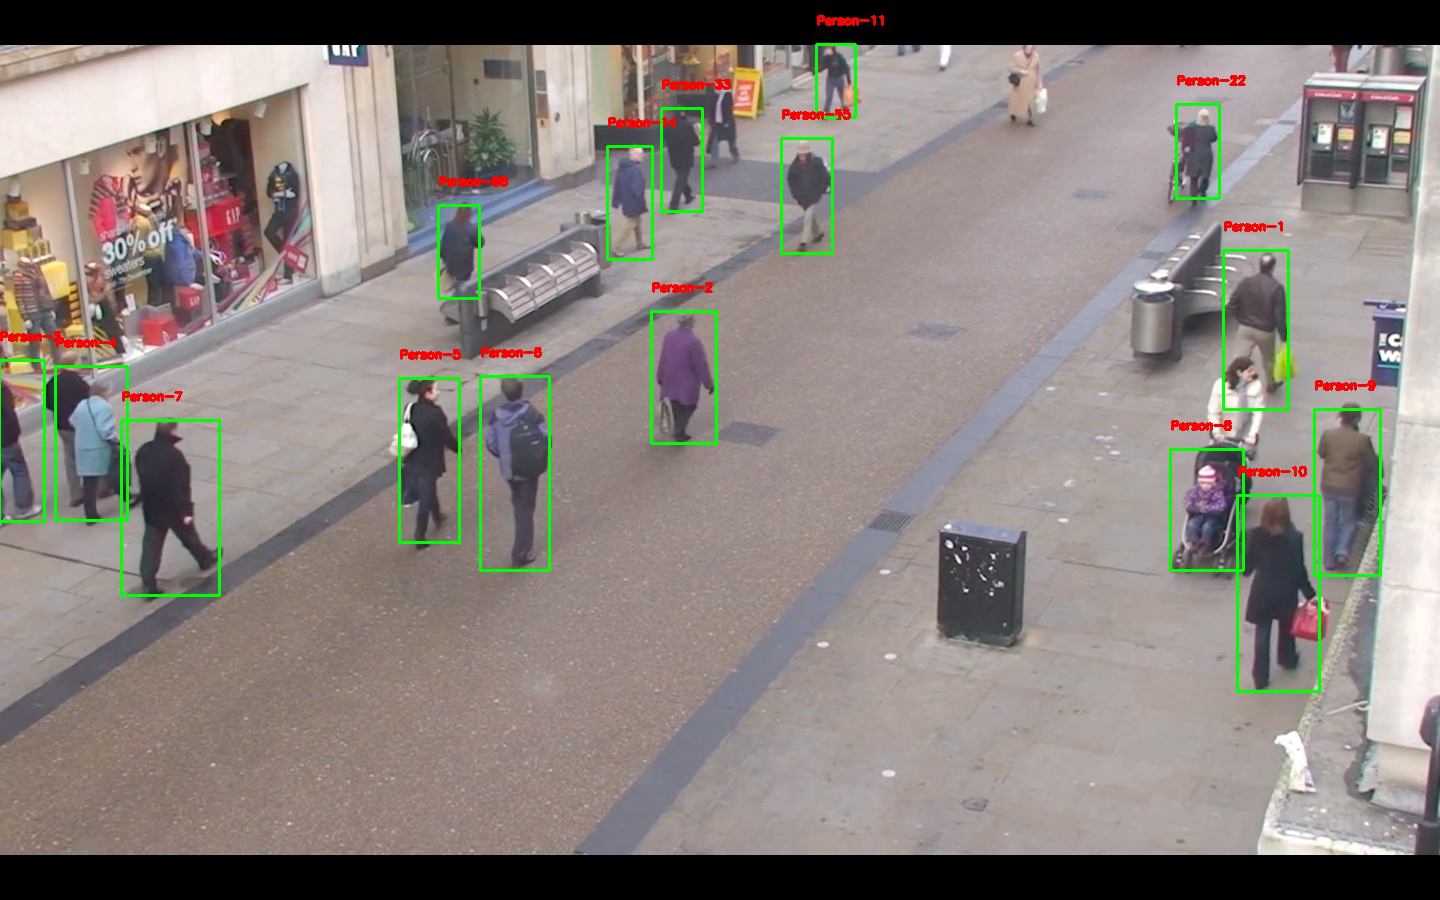

In [62]:
from PIL import Image
Image.open("DETECTED_IMAGE_new.jpg")

In [65]:
df

Person    X1   Y1    X2   Y2    Cx   Cy
0    Person-1  1223  250  1288  409  1256  330
1    Person-2   651  311   716  443   684  377
2    Person-3    -1  360    44  521    21  441
3    Person-4    55  366   127  520    91  443
4    Person-5   399  378   459  542   429  460
5    Person-6   480  376   549  570   515  473
6    Person-7   121  420   219  595   170  508
7    Person-8  1170  449  1243  570  1207  510
8    Person-9  1314  409  1380  575  1347  492
9   Person-10  1237  495  1319  691  1278  593
10  Person-11   816   44   855  117   836   81
11  Person-12  1176  104  1219  198  1198  151
12  Person-13   661  108   702  211   682  160
13  Person-14   607  146   652  259   630  203
14  Person-15   781  138   832  253   807  196
15  Person-16   438  205   479  298   459  252

In [73]:
Total_Persons = len(df)
for i in range(Total_Persons):
    for j in range(i+1, Total_Persons):
        distance = np.sqrt((df["Cx"][i] - df["Cx"][j])**2 + (df["Cy"][i] - df["Cy"][j])**2)
        if distance < 100:
            Person1 = df.iloc[i, 1:5].values
            Person2 = df.iloc[j, 1:5].values
            image = cv2.rectangle(image, tuple(Person1[:2]), tuple(Person1[2:]), (0,0,255), 2)
            image = cv2.rectangle(image, tuple(Person2[:2]), tuple(Person2[2:]), (0,0,255), 2)
cv2.imwrite("New_Image.jpg", image)

True

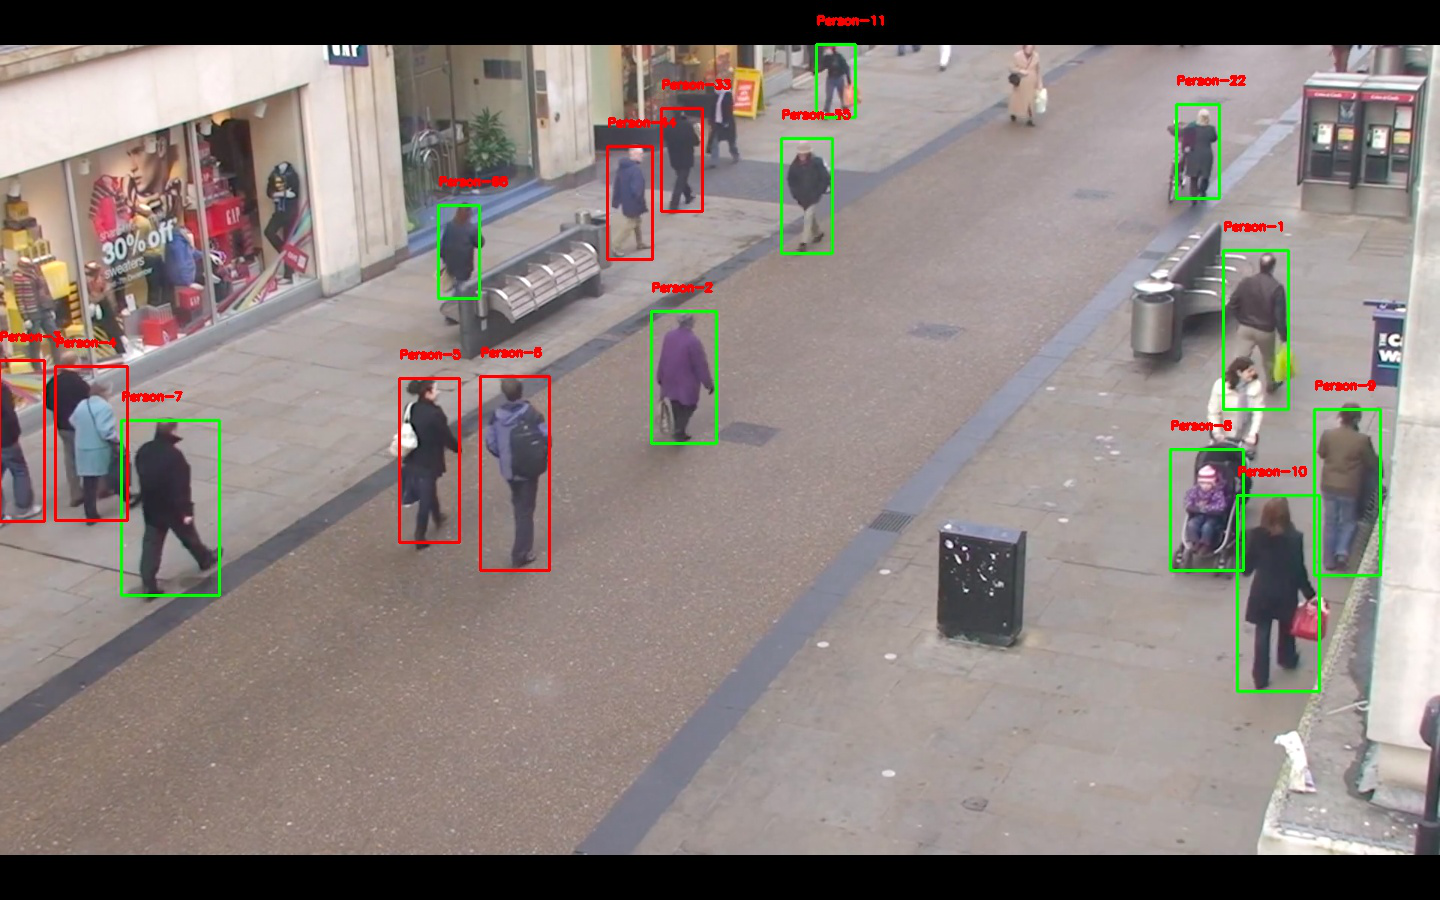

In [74]:
from PIL import Image
Image.open("New_Image.jpg")